In [21]:
#%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
ds = pd.read_csv("udp_data_timestamp_test6.txt", sep=',')
df = ds
df

,1686654934.8457572,b'Port,1,404.161400,-1.110700,219.873500,-0.664100,149.229800,0.294600,54.886100,...,137.592400,-3.104300,666.059700,0.358800,60.802200,1.695000,60.781900,3.448300,99.399300,-2.322200'
0,1.686655e+09,b'Port,1,307.9772,-0.7135,209.9401,-0.6352,157.8488,0.2100,63.9455,...,140.3699,-3.0678,920.2626,0.2476,57.8514,1.7331,56.6677,3.3863,96.1015,-2.381600'
1,1.686655e+09,b'Port,1,1811.8530,-4.3359,2025.0750,-2.1175,1331.6917,2.1853,582.7981,...,9698.2148,-0.4858,1685.0601,1.8010,1028.7526,2.2002,1412.6026,2.9173,2462.8259,-0.780900'
2,1.686655e+09,b'Port,1,1590.1689,-3.1341,902.9981,-2.2966,1433.8435,1.2171,703.5157,...,3883.5288,0.4717,3278.9743,1.0775,901.2188,2.2088,2096.0512,3.0777,5117.9980,-1.151500'
3,1.686655e+09,b'Port,1,3600.2236,-2.0832,1157.0460,-0.3560,1185.2069,-0.1220,605.6958,...,4453.3178,-0.3911,1713.4368,0.1149,746.0419,2.1527,584.7728,3.0363,3201.7204,-1.844900'
4,1.686655e+09,b'Port,1,524.5138,-3.2351,1511.9530,0.0592,1884.3551,0.8133,552.9891,...,382.4595,-1.5597,1950.7966,0.3563,545.5923,2.0943,816.0471,2.7622,4973.5297,-2.469500'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,1.686655e+09,b'Port,1,409.8872,0.3818,207.6130,0.9613,59.9228,1.5884,106.8585,...,493.6586,-1.0546,27.1929,-0.6998,36.0310,1.5027,54.0123,-1.4473,47.1470,3.206100'
277,1.686655e+09,b'Port,1,278.8441,0.4613,193.5030,0.7944,62.6730,1.5784,157.2812,...,535.8590,-0.9396,28.4363,-0.7072,38.9451,1.5927,41.9907,-1.0255,42.7124,3.080300'
278,1.686655e+09,b'Port,1,509.1565,-5.7341,204.3449,0.7015,84.1510,2.0184,96.1102,...,350.2647,-0.9635,35.1589,-0.6438,40.4369,1.6358,33.4968,-0.7265,37.1506,2.930500'
279,1.686655e+09,b'Port,1,734.1113,-5.7725,305.5921,0.7438,81.9920,2.6032,110.1300,...,598.0346,0.9148,35.5243,-0.6242,39.4439,1.6970,29.1056,-0.7751,39.1408,2.999600'


In [23]:
df.columns.values[0] = "timestamp"  
df.rename(columns={'1':'Port1'}, inplace=True)
df.rename(columns={'2':'Port2'}, inplace=True)
df.rename(columns={'3':'Port3'}, inplace=True)
df.rename(columns={'4':'Port4'}, inplace=True)
df.columns

Index(['timestamp', 'b'Port', 'Port1', '404.161400', '-1.110700', '219.873500',
       '-0.664100', '149.229800', '0.294600', '54.886100', '1.456600',
       '44.754600', '-4.198400', '37.783200', '2.390700'', 'b'Port.1', 'Port2',
       '1.000000', '1.000000.1', '1.000000.2', '1.000000.3', '1.000000.4',
       '1.000000.5', '1.000000.6', '1.000000.7', '1.000000.8', '1.000000.9',
       '1.000000.10', '1.000000'', 'b'Port.2', 'Port3', '440.482200',
       '1.364900', '54.922200', '1.784600', '88.693200', '2.090700',
       '86.134400', '2.342100', '58.736200', '-2.576200', '215.225400',
       '-0.782400'', 'b'Port.3', 'Port4', '132.759100', '-3.388500',
       '137.592400', '-3.104300', '666.059700', '0.358800', '60.802200',
       '1.695000', '60.781900', '3.448300', '99.399300', '-2.322200''],
      dtype='object')

In [24]:
# rename all columns
port_mappings = {
    'Port1': {'prefix': 'R1_', 'range': 12},
    'Port2': {'prefix': 'R2_', 'range': 12},
    'Port3': {'prefix': 'R3_', 'range': 12},
    'Port4': {'prefix': 'R4_', 'range': 12}
}
print(port_mappings)
for port, mapping in port_mappings.items():
    start_column = port
    prefix = mapping['prefix']
    column_range = mapping['range']

    if start_column in df.columns:
        start_index = df.columns.get_loc(start_column)
        new_column_names = [prefix + str(i) for i in range(1, column_range + 1)]
        df = df.rename(columns=dict(zip(df.columns[start_index + 1:start_index + column_range + 1], new_column_names)))
    else:
        print(f"Error: column'{start_column}' not found")

df.columns


{'Port1': {'prefix': 'R1_', 'range': 12}, 'Port2': {'prefix': 'R2_', 'range': 12}, 'Port3': {'prefix': 'R3_', 'range': 12}, 'Port4': {'prefix': 'R4_', 'range': 12}}


Index(['timestamp', 'b'Port', 'Port1', 'R1_1', 'R1_2', 'R1_3', 'R1_4', 'R1_5',
       'R1_6', 'R1_7', 'R1_8', 'R1_9', 'R1_10', 'R1_11', 'R1_12', 'b'Port.1',
       'Port2', 'R2_1', 'R2_2', 'R2_3', 'R2_4', 'R2_5', 'R2_6', 'R2_7', 'R2_8',
       'R2_9', 'R2_10', 'R2_11', 'R2_12', 'b'Port.2', 'Port3', 'R3_1', 'R3_2',
       'R3_3', 'R3_4', 'R3_5', 'R3_6', 'R3_7', 'R3_8', 'R3_9', 'R3_10',
       'R3_11', 'R3_12', 'b'Port.3', 'Port4', 'R4_1', 'R4_2', 'R4_3', 'R4_4',
       'R4_5', 'R4_6', 'R4_7', 'R4_8', 'R4_9', 'R4_10', 'R4_11', 'R4_12'],
      dtype='object')

In [25]:
# df.dtypes

In [26]:
def reciprocal(d):
    # drop timestamp and identify numeric columns
    ds=d.drop(['timestamp',"b'Port","b'Port.1","b'Port.2", "b'Port.3",'Port1','Port2', 'Port3', 'Port4'], axis=1)
    numeric_columns = ds.select_dtypes(include=[np.number]).columns
    ds[numeric_columns] = ds[numeric_columns].apply(lambda x: 1 / x)
    return ds

dd = reciprocal(df)
dd

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R1_7,R1_8,R1_9,R1_10,...,R4_3,R4_4,R4_5,R4_6,R4_7,R4_8,R4_9,R4_10,R4_11,R4_12
0,0.003247,-1.401542,0.004763,-1.574307,0.006335,4.761905,0.015638,0.666578,0.022479,-0.239458,...,0.007124,-0.325966,0.001087,4.038772,0.017286,0.577001,0.017647,0.295308,0.010406,-2.381600'
1,0.000552,-0.230633,0.000494,-0.472255,0.000751,0.457603,0.001716,-0.641313,0.000527,-1.062812,...,0.000103,-2.058460,0.000593,0.555247,0.000972,0.454504,0.000708,0.342783,0.000406,-0.780900'
2,0.000629,-0.319071,0.001107,-0.435426,0.000697,0.821625,0.001421,-0.640205,0.000442,1.663340,...,0.000257,2.119992,0.000305,0.928074,0.001110,0.452735,0.000477,0.324918,0.000195,-1.151500'
3,0.000278,-0.480031,0.000864,-2.808989,0.000844,-8.196721,0.001651,-0.638121,0.000431,-16.920474,...,0.000225,-2.556891,0.000584,8.703220,0.001340,0.464533,0.001710,0.329348,0.000312,-1.844900'
4,0.001907,-0.309109,0.000661,16.891892,0.000531,1.229559,0.001808,-0.650915,0.000612,-1.307702,...,0.002615,-0.641149,0.000513,2.806624,0.001833,0.477487,0.001225,0.362030,0.000201,-2.469500'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.002440,2.619172,0.004817,1.040258,0.016688,0.629564,0.009358,1.610565,0.003294,0.746436,...,0.002026,-0.948227,0.036774,-1.428980,0.027754,0.665469,0.018514,-0.690942,0.021210,3.206100'
277,0.003586,2.167787,0.005168,1.258812,0.015956,0.633553,0.006358,2.009646,0.003232,1.056747,...,0.001866,-1.064283,0.035166,-1.414027,0.025677,0.627865,0.023815,-0.975134,0.023412,3.080300'
278,0.001964,-0.174395,0.004894,1.425517,0.011883,0.495442,0.010405,1.167542,0.003117,2.119992,...,0.002855,-1.037883,0.028442,-1.553277,0.024730,0.611322,0.029854,-1.376462,0.026917,2.930500'
279,0.001362,-0.173235,0.003272,1.344447,0.012196,0.384143,0.009080,0.913492,0.006707,-1.282051,...,0.001672,1.093135,0.028150,-1.602051,0.025352,0.589275,0.034358,-1.290156,0.025549,2.999600'


In [27]:
dd.to_csv('data.csv', index=False)


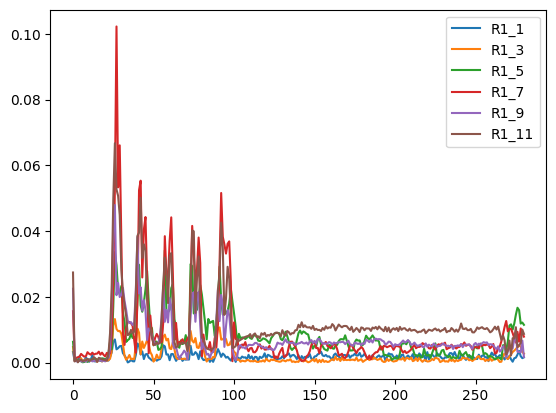

In [28]:
plt.plot(dd.index, dd[['R1_1', 'R1_3','R1_5','R1_7','R1_9','R1_11']])
plt.legend(['R1_1', 'R1_3','R1_5','R1_7','R1_9','R1_11'])

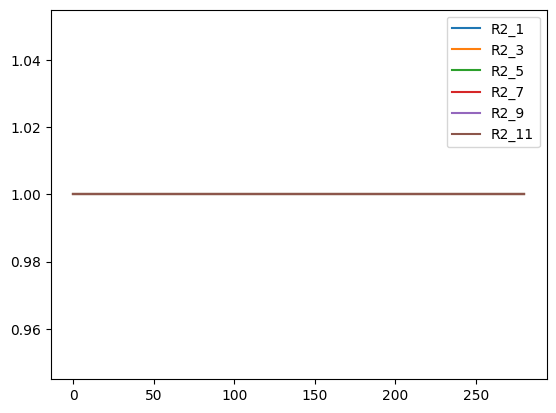

In [29]:
plt.plot(dd.index, dd[['R2_1', 'R2_3', 'R2_5', 'R2_7', 'R2_9', 'R2_11']])
plt.legend(['R2_1', 'R2_3', 'R2_5', 'R2_7', 'R2_9', 'R2_11'])

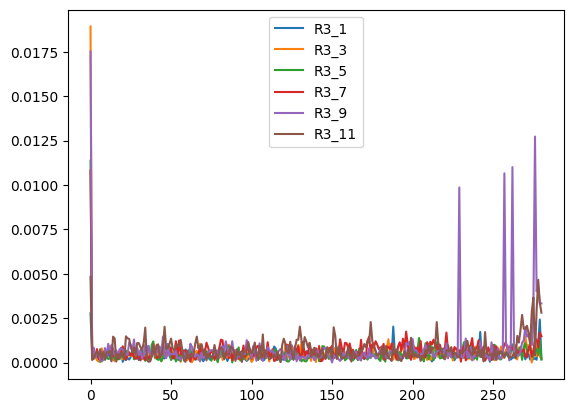

In [30]:
plt.plot(dd.index, dd[['R3_1', 'R3_3', 'R3_5', 'R3_7', 'R3_9', 'R3_11']])
plt.legend(['R3_1', 'R3_3', 'R3_5', 'R3_7', 'R3_9', 'R3_11'])

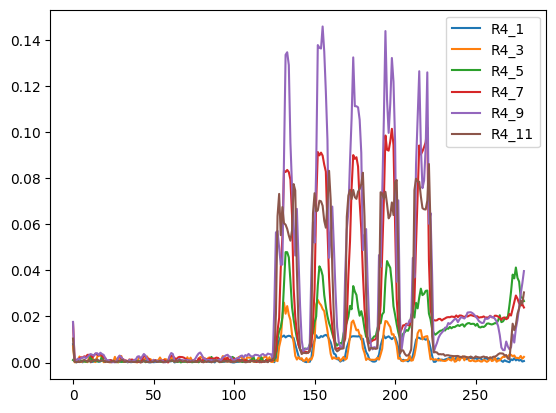

In [31]:
plt.plot(dd.index, dd[['R4_1', 'R4_3', 'R4_5', 'R4_7', 'R4_9','R4_11']])
plt.legend(['R4_1', 'R4_3', 'R4_5', 'R4_7', 'R4_9', 'R4_11'])